# Project: Data Investigation of Gender-Based Correlation of Indices

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

For this project, I choose to investigate the provided data in relation to an actual and very relevant topic: Gender Diversity. 

I have screened the Gapminder Data for a relevant statistic and choose to take the Sex Ratio statistic as starting position. In the following section, I will analyse the provided data in the light of the following question:
1. Is the world male or female?

and 
2. What does the outcome of question 1 mean for different indicators in terms of correlation?

To answer my questions, I have downloaded the following Data sheets: 
1. Sex Ratio (male divided by female, per 100) among total population of all age groups: sex_ratio_all_age_groups.csv 
2. Population, total: population_total.csv
3. GDP per capita (USD Inflation-adjusted): gdppercapita_us_inflation_adjusted.csv
4. GDP per capita, yearly growth: gdp_total_yearly_growth.csv
5. Democracy Index (EIU): demox_eiu.csv
6. Military expenditure in % of GDP: military_expenditure_percent_of_gdp.csv
7. Registered four-wheel motor vehicles per 1000 persons: cars_trucks_and_buses_per_1000_persons.csv
8. Alcohol consumption per adult: alcohol_consumption_per_adult_15plus_litres.csv

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling

First of all, all CSVs need to be loaded.

For the moment, only the Sex Ratio and the population datasets are necessary to answer the first question. Therefore, cleaning will be done for these two datasets first.

In [2]:
df_sexratio = pd.read_csv ('sex_ratio_all_age_groups.csv')
df_pop = pd.read_csv('population_total.csv')
df_gdp = pd.read_csv('gdppercapita_us_inflation_adjusted.csv')
df_growth = pd.read_csv('gdp_total_yearly_growth.csv')
df_dem = pd.read_csv('demox_eiu.csv')
df_mil = pd.read_csv('military_expenditure_percent_of_gdp.csv')
df_cars = pd.read_csv('cars_trucks_and_buses_per_1000_persons.csv')
df_alc = pd.read_csv('alcohol_consumption_per_adult_15plus_litres.csv')
df_sexratio.head()

,country,1950,1951,1952,1953,1954,1955,1956,1957,1958,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,112.0,NaN,NaN,NaN,NaN,109.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,98.6,NaN,NaN,NaN,NaN,98.4
1,Albania,105.0,NaN,NaN,NaN,NaN,106.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,104.0,NaN,NaN,NaN,NaN,104.0
2,Algeria,103.0,NaN,NaN,NaN,NaN,102.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,103.0,NaN,NaN,NaN,NaN,103.0
3,Angola,94.2,NaN,NaN,NaN,NaN,94.4,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,95.6,NaN,NaN,NaN,NaN,95.5
4,Antigua and Barbuda,97.4,NaN,NaN,NaN,NaN,97.8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,97.9,NaN,NaN,NaN,NaN,97.9


This Dataset describes the Sex Ratio as male divided by female (per 100) among all age groups per country. This suggests that if ratio is > 100 then male population exceeds female and vice versa. 

It looks like the ratio is investigated only every five years and there are four years of cells with missing information following an entry. The total number of columns and rows is:

In [3]:
df_sexratio.shape

(184, 152)

To reduce complexity, I decided to drop the Null values.

In [4]:
df_sexratio.dropna(axis=1, inplace=True)
df_sexratio.shape

(184, 32)

There is data beyond 2020 provided, which I will not need for my analysis, so I will drop it and select only the data from 1950 to 2020. 

In [5]:
df_sr_new = df_sexratio.iloc[:, :16]
df_sr_new.head()

,country,1950,1955,1960,1965,1970,1975,1980,1985,1990,1995,2000,2005,2010,2015,2020
0,Afghanistan,112.0,109.0,107.0,105.0,104.0,103.0,103.0,104.0,105.0,107.0,106.0,107.0,106.0,106.0,106.0
1,Albania,105.0,106.0,106.0,106.0,106.0,106.0,106.0,106.0,105.0,96.9,102.0,101.0,101.0,102.0,102.0
2,Algeria,103.0,102.0,101.0,101.0,101.0,101.0,102.0,102.0,103.0,103.0,103.0,102.0,102.0,102.0,102.0
3,Angola,94.2,94.4,94.6,94.7,95.0,95.3,95.6,95.6,95.7,95.5,95.6,95.6,95.8,96.1,96.4
4,Antigua and Barbuda,97.4,97.8,89.0,90.6,91.5,92.0,95.3,94.4,93.6,94.6,89.1,92.1,92.0,92.2,92.4


Now, the data needs to be checked for other Null values and dublicates:

In [6]:
df_sr_new.isnull().sum().any()

False

In [7]:
df_sr_new.shape

(184, 16)

In [8]:
sum(df_sr_new.duplicated())

0

The first dataset is ready for data exploration. Additionally the population dataset is required for the analysis and will be prepared similarly to the first dataset.

In [9]:
df_pop.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,3280000,3280000,3280000,3280000,3280000,3280000,3280000,3280000,3280000,...,76600000,76400000,76300000,76100000,76000000,75800000,75600000,75400000,75200000,74900000
1,Albania,400000,402000,404000,405000,407000,409000,411000,413000,414000,...,1330000,1300000,1270000,1250000,1220000,1190000,1170000,1140000,1110000,1090000
2,Algeria,2500000,2510000,2520000,2530000,2540000,2550000,2560000,2560000,2570000,...,70400000,70500000,70500000,70600000,70700000,70700000,70700000,70700000,70700000,70700000
3,Andorra,2650,2650,2650,2650,2650,2650,2650,2650,2650,...,63000,62900,62900,62800,62700,62700,62600,62500,62500,62400
4,Angola,1570000,1570000,1570000,1570000,1570000,1570000,1570000,1570000,1570000,...,168000000,170000000,172000000,175000000,177000000,179000000,182000000,184000000,186000000,188000000


I require only the columns that are also present in the sex ratio dataset, so I will drop off the other years. 

In [10]:
df_pop2 = df_pop[['country','1950','1955','1960','1965','1970','1975','1980','1985','1990','1995','2000','2005','2010','2015','2020']]
df_pop2.head()

,country,1950,1955,1960,1965,1970,1975,1980,1985,1990,1995,2000,2005,2010,2015,2020
0,Afghanistan,7750000,8270000,9000000,9960000,11200000,12700000,13400000,11900000,12400000,18100000,20800000,25700000,29200000,34400000,38900000
1,Albania,1260000,1420000,1640000,1900000,2150000,2410000,2680000,2970000,3290000,3110000,3130000,3090000,2950000,2890000,2880000
2,Algeria,8870000,9770000,11100000,12600000,14500000,16600000,19200000,22400000,25800000,28800000,31000000,33100000,36000000,39700000,43900000
3,Andorra,6200,9230,13400,18500,24300,30700,36100,44600,54500,63900,65400,78900,84500,78000,77300
4,Angola,4550000,5040000,5450000,5770000,5890000,7020000,8340000,9960000,11800000,13900000,16400000,19400000,23400000,27900000,32900000


In [11]:
df_pop2.shape

(195, 16)

The columns number does match now, but the rows doesn't. I will align the datasets by dropping off the countries that are not present in the Sex Ratio dataset.

In [12]:
df_pop3 = df_pop2[df_pop2.country.isin(df_sr_new.country)]
df_pop3.head()

,country,1950,1955,1960,1965,1970,1975,1980,1985,1990,1995,2000,2005,2010,2015,2020
0,Afghanistan,7750000,8270000,9000000,9960000,11200000,12700000,13400000,11900000,12400000,18100000,20800000,25700000,29200000,34400000,38900000
1,Albania,1260000,1420000,1640000,1900000,2150000,2410000,2680000,2970000,3290000,3110000,3130000,3090000,2950000,2890000,2880000
2,Algeria,8870000,9770000,11100000,12600000,14500000,16600000,19200000,22400000,25800000,28800000,31000000,33100000,36000000,39700000,43900000
4,Angola,4550000,5040000,5450000,5770000,5890000,7020000,8340000,9960000,11800000,13900000,16400000,19400000,23400000,27900000,32900000
5,Antigua and Barbuda,45500,49600,54100,58700,64200,62700,61900,61800,62500,68700,76000,81500,88000,93600,97900


In [13]:
df_pop3.shape

(184, 16)

Finally, the indexes need to be reset and I will check for Null values and duplicates. 

In [14]:
df_pop3.reset_index(drop=True, inplace=True)
df_pop3.head()

,country,1950,1955,1960,1965,1970,1975,1980,1985,1990,1995,2000,2005,2010,2015,2020
0,Afghanistan,7750000,8270000,9000000,9960000,11200000,12700000,13400000,11900000,12400000,18100000,20800000,25700000,29200000,34400000,38900000
1,Albania,1260000,1420000,1640000,1900000,2150000,2410000,2680000,2970000,3290000,3110000,3130000,3090000,2950000,2890000,2880000
2,Algeria,8870000,9770000,11100000,12600000,14500000,16600000,19200000,22400000,25800000,28800000,31000000,33100000,36000000,39700000,43900000
3,Angola,4550000,5040000,5450000,5770000,5890000,7020000,8340000,9960000,11800000,13900000,16400000,19400000,23400000,27900000,32900000
4,Antigua and Barbuda,45500,49600,54100,58700,64200,62700,61900,61800,62500,68700,76000,81500,88000,93600,97900


In [15]:
to_drop = df_pop3[~df_pop3.country.isin(df_sr_new.country)]
to_drop

,country,1950,1955,1960,1965,1970,1975,1980,1985,1990,1995,2000,2005,2010,2015,2020


In [16]:
df_pop3.isnull().sum().any()

False

In [17]:
sum(df_pop3.duplicated())

0

Now, the datasets are ready for the Exploratory Data Analysis.

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: Is the world male or female? 
First of all, let's have have a view at the statistics of the dataset.

In [18]:
df_sr_new.describe()

,1950,1955,1960,1965,1970,1975,1980,1985,1990,1995,2000,2005,2010,2015,2020
count,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000
mean,98.636413,98.689674,98.772826,99.108696,99.324457,99.879891,100.044565,100.062500,100.205435,100.248913,100.063043,100.596196,101.782065,101.902174,102.003261
std,8.936365,8.694396,9.311103,9.138493,9.789528,13.192860,12.731213,11.692338,12.012301,12.230563,12.179210,14.790779,22.882347,22.148404,21.279246
min,74.400000,76.900000,79.000000,82.000000,83.400000,84.200000,84.900000,85.800000,86.900000,85.400000,85.000000,84.700000,84.500000,84.800000,85.100000
25%,94.400000,94.675000,94.700000,94.975000,95.475000,95.850000,95.875000,96.000000,96.075000,96.100000,96.275000,96.075000,96.400000,96.600000,96.675000
50%,98.550000,98.700000,98.700000,98.850000,98.900000,98.900000,98.600000,98.550000,98.400000,98.300000,98.450000,98.450000,98.650000,99.000000,99.050000
75%,103.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
max,148.000000,159.000000,179.000000,160.000000,176.000000,227.000000,229.000000,202.000000,203.000000,198.000000,208.000000,236.000000,314.000000,307.000000,293.000000


The first thing to notice is the mean. It is increasing over time from 98.6 in the 1950s to 102 in the 2020s. A graph will visualize the development.

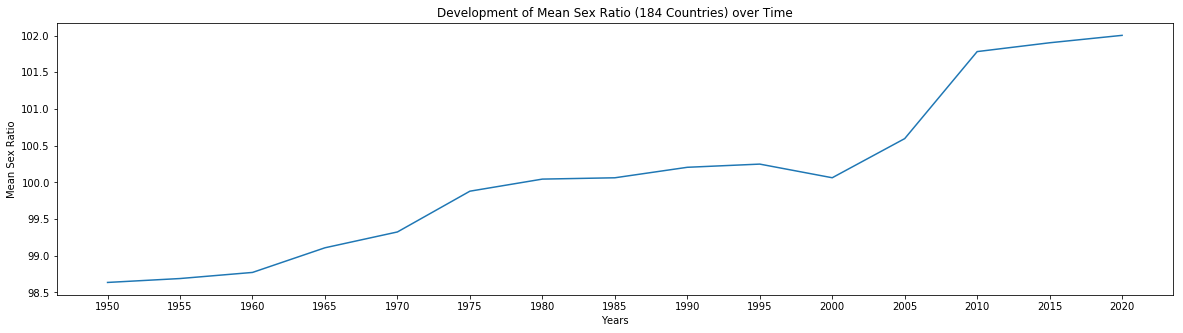

In [19]:
plt.figure(figsize=(20,5))
plt.plot(df_sr_new.mean())
plt.title('Development of Mean Sex Ratio (184 Countries) over Time')
plt.xlabel('Years')
plt.ylabel('Mean Sex Ratio')
plt.show()

The conclusion is that on majority, countries have become "more male" over time i.e. the ratio of male against female is increasing. However, it must be noted that it is a ratio per country and each ratio is included in the mean with equal weight. This results in small countries weighting as equal as big countries. To correct this mispresentation I will weight the country by population. For this the Population dataset will be used. 

In [20]:
df_pop3.head()

,country,1950,1955,1960,1965,1970,1975,1980,1985,1990,1995,2000,2005,2010,2015,2020
0,Afghanistan,7750000,8270000,9000000,9960000,11200000,12700000,13400000,11900000,12400000,18100000,20800000,25700000,29200000,34400000,38900000
1,Albania,1260000,1420000,1640000,1900000,2150000,2410000,2680000,2970000,3290000,3110000,3130000,3090000,2950000,2890000,2880000
2,Algeria,8870000,9770000,11100000,12600000,14500000,16600000,19200000,22400000,25800000,28800000,31000000,33100000,36000000,39700000,43900000
3,Angola,4550000,5040000,5450000,5770000,5890000,7020000,8340000,9960000,11800000,13900000,16400000,19400000,23400000,27900000,32900000
4,Antigua and Barbuda,45500,49600,54100,58700,64200,62700,61900,61800,62500,68700,76000,81500,88000,93600,97900


With the apply function I will find out the relative percentage of the country to enable weighting.

In [21]:
df_pop4 = df_pop3.drop(['country'], axis=1)
df_pop5 = df_pop4.apply(lambda x: x/x.sum(), axis=0)
df_pop5.head()

,1950,1955,1960,1965,1970,1975,1980,1985,1990,1995,2000,2005,2010,2015,2020
0,0.003073,0.003000,0.002983,0.003002,0.003046,0.003134,0.003026,0.002457,0.002341,0.003171,0.003404,0.003951,0.004223,0.004686,0.005015
1,0.000500,0.000515,0.000544,0.000573,0.000585,0.000595,0.000605,0.000613,0.000621,0.000545,0.000512,0.000475,0.000427,0.000394,0.000371
2,0.003517,0.003544,0.003679,0.003797,0.003943,0.004096,0.004336,0.004625,0.004871,0.005046,0.005073,0.005089,0.005206,0.005407,0.005660
3,0.001804,0.001828,0.001806,0.001739,0.001602,0.001732,0.001883,0.002056,0.002228,0.002435,0.002684,0.002983,0.003384,0.003800,0.004242
4,0.000018,0.000018,0.000018,0.000018,0.000017,0.000015,0.000014,0.000013,0.000012,0.000012,0.000012,0.000013,0.000013,0.000013,0.000013


Just one check whether the percentages sum up to 100%.

In [22]:
df_pop5.sum(axis=0)

1950    1.0
1955    1.0
1960    1.0
1965    1.0
1970    1.0
1975    1.0
1980    1.0
1985    1.0
1990    1.0
1995    1.0
2000    1.0
2005    1.0
2010    1.0
2015    1.0
2020    1.0
dtype: float64

Now the sex ratio index will be weigthed by multiplying it with the percentage of the respective country population.

In [23]:
df_wsr = df_sr_new.multiply(df_pop5, axis='columns')
df_wsr.head()

,1950,1955,1960,1965,1970,1975,1980,1985,1990,1995,2000,2005,2010,2015,2020,country
0,0.344149,0.326963,0.319185,0.315165,0.316763,0.322751,0.311676,0.255523,0.245803,0.339331,0.360839,0.422768,0.447604,0.496668,0.531634,NaN
1,0.052455,0.054596,0.057619,0.060694,0.061977,0.063030,0.064151,0.065000,0.065217,0.052801,0.052250,0.047980,0.043087,0.040151,0.037875,NaN
2,0.362233,0.361461,0.371587,0.383514,0.398265,0.413672,0.442244,0.471735,0.501687,0.519745,0.522569,0.519054,0.531017,0.551560,0.577327,NaN
3,0.169937,0.172571,0.170885,0.164670,0.152168,0.165066,0.180047,0.196593,0.213192,0.232584,0.256594,0.285131,0.324180,0.365199,0.408912,NaN
4,0.001757,0.001759,0.001596,0.001603,0.001597,0.001423,0.001332,0.001205,0.001104,0.001139,0.001108,0.001154,0.001171,0.001175,0.001166,NaN


The last thing to do is to drop the Null column, and then to visualise the new weightet sex ratio.

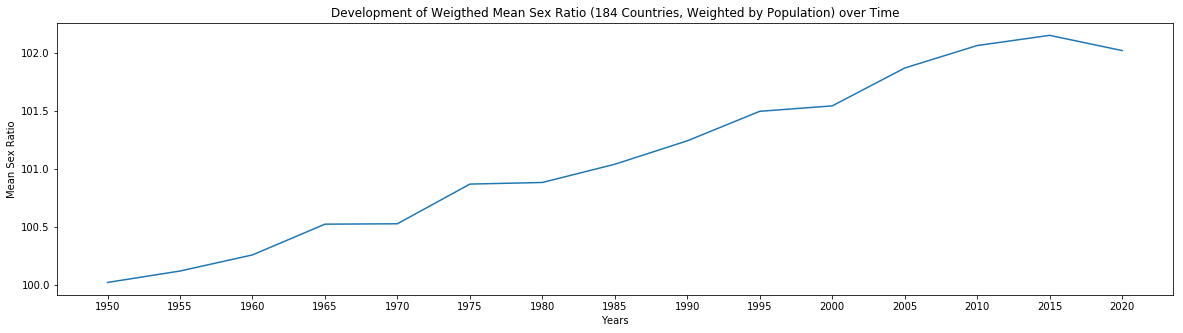

In [24]:
df_wsr.drop(['country'], axis=1, inplace=True)
plt.figure(figsize=(20,5))
plt.plot(df_wsr.sum())
plt.title('Development of Weigthed Mean Sex Ratio (184 Countries, Weighted by Population) over Time')
plt.xlabel('Years')
plt.ylabel('Mean Sex Ratio')
plt.show()

There is not much change, though. Based on the weighted Sex Ratio, the development is still very similar to the not-weighted Sex Ratio. However, it is noticeable that the change became less as the index now starts at 100 and not at 98.6. Still the Sex Ratio is developing towards a more male population. Only the slight drop at 2020 is new.

I try to find out more about this and to look at the countries. First of all, I will select some data from the beginning point (1950) and the ending point of the scale (2020) and also the mean. 

In [25]:
df_sr_summary = df_sr_new.iloc[:, [0,1]+[-1]]
df_sr_summary = df_sr_summary.copy()
df_sr_summary['sr_mean'] = df_sr_summary.mean(axis=1)
df_sr_summary.head()

,country,1950,2020,sr_mean
0,Afghanistan,112.0,106.0,109.0
1,Albania,105.0,102.0,103.5
2,Algeria,103.0,102.0,102.5
3,Angola,94.2,96.4,95.3
4,Antigua and Barbuda,97.4,92.4,94.9


In [26]:
df_sr_summary.describe()

,1950,2020,sr_mean
count,184.000000,184.000000,184.000000
mean,98.636413,102.003261,100.319837
std,8.936365,21.279246,12.645850
min,74.400000,85.100000,80.600000
25%,94.400000,96.675000,95.525000
50%,98.550000,99.050000,98.775000
75%,103.000000,101.000000,101.512500
max,148.000000,293.000000,198.000000


From the data, it can be seen that over time, not only the mean is increasing, but the standard deviation also does. It suggests that countries not only have become more male on average, but that the differences in countries also more than doubled. This would mean that now there are more countries that have a greater female distribution as well as more countries that have a greater male distribution compared to 70 years ago.

It is also noticeable that there are some outliers, especially in the max range, as the histogram below also shows. Let's have a look at the countries behind this data.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0624412b38>]], dtype=object)

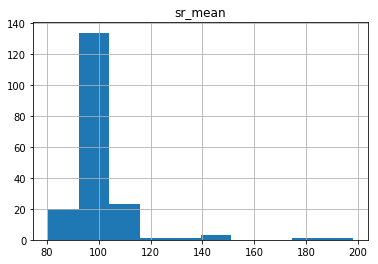

In [27]:
df_sr_summary.hist(column='sr_mean')

In [28]:
df_sr_summary.nlargest(10, 'sr_mean')

,country,1950,2020,sr_mean
132,Qatar,103.0,293.0,198.0
173,United Arab Emirates,103.0,250.0,176.5
122,Oman,103.0,199.0,151.0
11,Bahrain,116.0,180.0,148.0
86,Kuwait,148.0,135.0,141.5
99,Maldives,130.0,133.0,131.5
138,Saudi Arabia,103.0,135.0,119.0
123,Pakistan,120.0,106.0,113.0
146,Solomon Islands,123.0,103.0,113.0
137,Sao Tome and Principe,125.0,99.2,112.1


It is interesting: Those countries, which had already a ratio above the mean, tended to increase even more, much more. Only  Kuwait had a negative development.

And there tends to be a regional cluster, as many of the countries above lie in the Middle-East.

In [29]:
df_sr_summary.nsmallest(10, 'sr_mean')

,country,1950,2020,sr_mean
172,Ukraine,75.2,86.0,80.60
89,Latvia,76.2,85.1,80.65
53,Estonia,74.4,88.6,81.50
134,Russia,76.6,86.8,81.70
14,Belarus,79.2,87.0,83.10
94,Lithuania,82.2,85.5,83.85
13,Barbados,85.1,91.6,88.35
60,Georgia,85.8,91.3,88.55
6,Armenia,90.3,88.9,89.60
106,Moldova,87.6,91.8,89.70


Countries with smaller Sex Ratio remained below the mean the over the years, even if they also did show an increase over years.

It is interesting to see that these countries also lie by majority close to each other, in East Europe.

### Research Question 2 : What effects correlate with the mean Sex Ratio?

As now the data showed, that the world tends to develop towards a more male world (even though a ratio of 102 is not very high, we must admit) it would be interesting to see what indices might correlate with this.  

First of all, I want to check on GDP and GDP growth for correlation. 
1. GDP per Capita
2. GDP growth
Additionally, I will use some general stereotypes that are referenced to men and check for correlation. These will be the following:
3. Stereotype: Men focus on hierarchy - Index: Democracy Index 
4. Stereotype: Men are more brutal / focused on geographical power  - Index: Military expenditure
4. Stereotype: Men like cars - Index: Registered cars
5. Stereotype: Men drink more alcohol - Index: Alcohol consumption

Let's start by displaying the data.

In [30]:
df_gdp.head()

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,445.0,525.0,553,569.0,630.0,634.0,630.0,620.0,618.0,618.0
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3780.0,3930.0,4090,4210.0,4280.0,4330.0,4410.0,4520.0,4680.0,4870.0
2,Algeria,2470.0,2080.0,1630.0,2130.0,2200.0,2280.0,2110.0,2240.0,2410.0,...,4390.0,4390.0,4460,4500.0,4560.0,4600.0,4680.0,4760.0,4830.0,4830.0
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,43900.0,42000.0,39700,38200.0,38200.0,39100.0,40800.0,41800.0,43000.0,43900.0
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3580.0,3540.0,3530,3540.0,3590.0,3710.0,3750.0,3730.0,3580.0,3480.0


In [31]:
df_growth.head()

,country,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,6.55,12.40,4.56,13.600,2.50,20.20,8.04,6.98,14.80,4.47
1,Albania,0.418,0.418,0.418,0.418,0.418,0.418,0.418,0.418,0.418,...,5.97,5.53,5.77,5.850,7.24,3.28,3.36,2.86,2.64,2.06
2,Algeria,0.356,0.356,0.356,0.356,0.356,0.356,0.356,0.356,0.356,...,5.41,5.38,1.72,3.420,2.02,1.70,3.57,2.31,2.58,2.99
3,Andorra,0.166,0.166,0.166,0.166,0.166,0.166,0.166,0.166,0.166,...,8.64,7.80,4.97,0.161,-4.22,-5.06,-3.43,-2.83,NaN,NaN
4,Angola,0.425,0.425,0.425,0.425,0.425,0.425,0.425,0.425,0.425,...,11.20,20.50,18.60,23.200,13.80,2.39,3.45,3.87,4.96,3.79


In [32]:
df_dem.head()

,country,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,30.6,30.4,30.2,27.5,24.8,24.8,24.8,24.8,27.7,27.7,25.5,25.5,29.7
1,Albania,59.1,59.1,59.1,58.9,58.6,58.1,56.7,56.7,56.7,59.1,59.1,59.8,59.8
2,Algeria,31.7,32.5,33.2,33.8,34.4,34.4,38.3,38.3,38.3,39.5,35.6,35.6,35.0
3,Angola,24.1,28.8,33.5,33.4,33.2,33.2,33.5,33.5,33.5,33.5,34.0,36.2,36.2
4,Argentina,66.3,66.3,66.3,67.3,68.4,68.4,68.4,68.4,68.4,70.2,69.6,69.6,70.2


In [33]:
df_mil.head()

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.340,2.090,1.950,1.820,1.180,1.080,1.300,0.993,0.955,0.907
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.980,1.520,1.560,1.530,1.490,1.410,1.350,1.170,1.100,1.240
2,Algeria,NaN,NaN,NaN,2.51,3.50,3.42,3.51,3.02,2.61,...,3.020,3.850,3.520,4.330,4.460,4.840,5.550,6.270,6.420,5.710
3,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.570,4.700,4.180,3.260,3.240,4.460,4.700,3.130,2.640,2.200
4,Argentina,1.55,2.14,2.66,1.68,1.15,1.07,1.17,1.40,1.69,...,0.763,0.887,0.815,0.764,0.785,0.838,0.878,0.865,0.827,0.910


In [34]:
df_cars.head()

,country,2002,2003,2004,2005,2006,2007
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,22.8
1,Albania,73.0,NaN,85.0,87.5,97.3,102.0
2,Algeria,NaN,88.0,89.0,91.0,NaN,NaN
3,Angola,NaN,NaN,NaN,NaN,NaN,39.6
4,Argentina,NaN,NaN,NaN,NaN,NaN,314.0


In [35]:
df_alc.head()

,country,1985,1986,1987,1988,1989,1990,1991,1992,1993,...,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.02,NaN,NaN,0.03
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,6.68,NaN,NaN,7.29
2,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.96,NaN,NaN,0.69
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,15.50,NaN,NaN,10.20
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.40,NaN,NaN,5.57


There are some things to notice:
1. There are datasets with Null values.
2. The countries vary in the different datasets.
2. The periods also vary in the datasets. 
I will drop of all values for the periods < 1950 because data before 1950 is not relevant for my comparison.

In [36]:
df_gdp.shape, df_growth.shape, df_dem.shape, df_mil.shape, df_cars.shape, df_alc.shape

((190, 59), (194, 214), (164, 14), (165, 59), (157, 7), (185, 25))

First, the data <1950 will be dropped.

In [37]:
todrop = df_growth.iloc[:, 1:150]
df_growth.drop(todrop, axis=1, inplace=True)
df_growth.head()

,country,1950,1951,1952,1953,1954,1955,1956,1957,1958,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,1.42,2.800,3.26,5.97,1.97,1.83,4.32,-0.182,5.42,...,6.55,12.40,4.56,13.600,2.50,20.20,8.04,6.98,14.80,4.47
1,Albania,0.87,6.460,2.53,6.77,5.84,8.52,4.11,9.760,7.83,...,5.97,5.53,5.77,5.850,7.24,3.28,3.36,2.86,2.64,2.06
2,Algeria,1.70,0.955,4.29,1.50,7.12,2.68,9.78,11.400,3.74,...,5.41,5.38,1.72,3.420,2.02,1.70,3.57,2.31,2.58,2.99
3,Andorra,4.48,12.100,12.40,12.50,12.50,12.40,12.20,12.000,11.80,...,8.64,7.80,4.97,0.161,-4.22,-5.06,-3.43,-2.83,NaN,NaN
4,Angola,4.04,4.090,4.19,4.13,-2.31,8.38,-1.59,9.790,5.46,...,11.20,20.50,18.60,23.200,13.80,2.39,3.45,3.87,4.96,3.79


To overcome the different qualitiy of entries, I will compare the means over the time axes and not a single year. By this I can also discover a general development and make sure that outliers in single years do not distort my analysis. Using the mean function that ignores the Null values makes further cleaning dispensable. 

In [38]:
df_sr_summary.head()

,country,1950,2020,sr_mean
0,Afghanistan,112.0,106.0,109.0
1,Albania,105.0,102.0,103.5
2,Algeria,103.0,102.0,102.5
3,Angola,94.2,96.4,95.3
4,Antigua and Barbuda,97.4,92.4,94.9


In [39]:
df_gdp2 = df_gdp.iloc[:, 0:1]
df_gdp = df_gdp.copy()
df_gdp2['gdp_mean'] = df_gdp.mean(axis=1, skipna=True)
df_gdp2.head()

,country,gdp_mean
0,Afghanistan,510.937500
1,Albania,2768.947368
2,Algeria,3473.965517
3,Andorra,40068.750000
4,Angola,2428.421053


Now, the mean values for Sex Ratio and GDP are calculated in different tables. In the next step, the datasets will be merged in an inner join to consider for the plot only countries that are present in all datasets. Bcause the merger will be done for some more datasets, a function will be created to reduce complexity.

In [40]:
def merge_func(df1, df2):
    return pd.merge(df1,df2, how='inner', on='country')

df_sr_summary = merge_func(df_sr_summary, df_gdp2)
df_sr_summary.head()

,country,1950,2020,sr_mean,gdp_mean
0,Afghanistan,112.0,106.0,109.0,510.937500
1,Albania,105.0,102.0,103.5,2768.947368
2,Algeria,103.0,102.0,102.5,3473.965517
3,Angola,94.2,96.4,95.3,2428.421053
4,Antigua and Barbuda,97.4,92.4,94.9,10379.512195


Now, it is noticeable that Andorra fell off, because it was not present in the Sex Ratio dataset, meaning that the merger was successful. Let's proceed with the other datasets.

In [41]:
df_growth2 = df_growth.iloc[:, 0:1]
df_growth = df_growth.copy()
df_growth2['gdp_growth_mean'] = df_growth.mean(axis=1, skipna=True)
df_growth2.head()

,country,gdp_growth_mean
0,Afghanistan,3.568719
1,Albania,4.212187
2,Algeria,4.102203
3,Andorra,5.745982
4,Angola,4.249781


In [42]:
df_dem2 = df_dem.iloc[:, 0:1]
df_dem = df_dem.copy()
df_dem2['dem_index_mean'] = df_dem.mean(axis=1, skipna=True)
df_dem2.head()

,country,dem_index_mean
0,Afghanistan,27.230769
1,Albania,58.523077
2,Algeria,35.430769
3,Angola,32.815385
4,Argentina,68.292308


In [43]:
df_mil2 = df_mil.iloc[:, 0:1]
df_mil = df_mil.copy()
df_mil2['mil_exp_mean'] = df_mil.mean(axis=1, skipna=True)
df_mil2.head()

,country,mil_exp_mean
0,Afghanistan,1.719750
1,Albania,2.948158
2,Algeria,2.949091
3,Angola,6.603335
4,Argentina,1.712810


In [44]:
df_cars2 = df_cars.iloc[:, 0:1]
df_cars = df_cars.copy()
df_cars2['cars_mean'] = df_cars.mean(axis=1, skipna=True)
df_cars2.head()

,country,cars_mean
0,Afghanistan,22.800000
1,Albania,88.960000
2,Algeria,89.333333
3,Angola,39.600000
4,Argentina,314.000000


In [45]:
df_alc2 = df_alc.iloc[:, 0:1]
df_alc = df_alc.copy()
df_alc2['alc_cons_mean'] = df_alc.mean(axis=1, skipna=True)
df_alc2.head()

,country,alc_cons_mean
0,Afghanistan,0.025
1,Albania,6.985
2,Algeria,0.825
3,Andorra,12.850
4,Angola,5.485


Now the means for every dataset are generated and will be merged in an inner join to the combined dataset of Sex Ratio and GDP mean.

In [46]:
df_sr_summary = merge_func(df_sr_summary, df_growth2)
df_sr_summary = merge_func(df_sr_summary, df_dem2)
df_sr_summary = merge_func(df_sr_summary, df_mil2)
df_sr_summary = merge_func(df_sr_summary, df_cars2)
df_sr_summary = merge_func(df_sr_summary, df_alc2)

In [47]:
df_sr_summary.to_csv('df_summary_sr_means.csv')
df_sr_summary.head()

,country,1950,2020,sr_mean,gdp_mean,gdp_growth_mean,dem_index_mean,mil_exp_mean,cars_mean,alc_cons_mean
0,Afghanistan,112.0,106.0,109.00,510.937500,3.568719,27.230769,1.719750,22.800000,0.025
1,Albania,105.0,102.0,103.50,2768.947368,4.212187,58.523077,2.948158,88.960000,6.985
2,Algeria,103.0,102.0,102.50,3473.965517,4.102203,35.430769,2.949091,89.333333,0.825
3,Angola,94.2,96.4,95.30,2428.421053,4.249781,32.815385,6.603335,39.600000,5.485
4,Argentina,106.0,95.9,100.95,7763.275862,3.059247,68.292308,1.712810,314.000000,9.675


In [48]:
df_sr_summary.shape

(138, 10)

A lot of countries fell off, as from 184 rows only 138 rows are now present. However, this number still should cover all major countries and should suffice to display correlation. 
First, let's have a view at the basis statistics.

In [49]:
df_sr_summary.describe()

,1950,2020,sr_mean,gdp_mean,gdp_growth_mean,dem_index_mean,mil_exp_mean,cars_mean,alc_cons_mean
count,138.000000,138.00000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000
mean,98.248551,101.99058,100.119565,10943.642923,3.989660,57.892977,2.761765,208.064336,7.177167
std,8.681268,24.07525,13.890998,15315.829576,1.625516,21.705639,2.776720,215.530568,4.946328
min,74.400000,85.10000,80.600000,255.241379,0.977958,15.492308,0.000000,0.295000,0.025000
25%,94.250000,96.60000,95.300000,1074.908046,3.129924,38.582692,1.518496,28.700000,3.276250
50%,98.400000,98.45000,98.500000,3727.057471,3.789062,60.757692,2.144457,111.483333,6.391667
75%,102.000000,100.00000,100.787500,13665.664716,4.504586,76.638462,3.093246,350.666667,11.002500
max,148.000000,293.00000,198.000000,66265.789474,13.162016,98.138462,22.636364,774.750000,19.766667


It can be noticed that for the Sex Ratio means, the gdp means, military expense means and the cars means there are some outliers in the data that may inhibit the visualization. Especially GDP data and Cars data vary in a great range.

I will calculate the correlation, then start plotting the graphs by order.

In [50]:
df_sr_summary.corr()

,1950,2020,sr_mean,gdp_mean,gdp_growth_mean,dem_index_mean,mil_exp_mean,cars_mean,alc_cons_mean
1950,1.000000,0.279558,0.554737,0.059261,0.318537,-0.133388,0.242586,-0.104459,-0.505712
2020,0.279558,1.000000,0.953933,0.417165,0.724275,-0.239784,0.390508,0.141675,-0.284989
sr_mean,0.554737,0.953933,1.000000,0.380024,0.727177,-0.249472,0.414208,0.090131,-0.404989
gdp_mean,0.059261,0.417165,0.380024,1.000000,0.207929,0.485644,0.096569,0.823807,0.253986
gdp_growth_mean,0.318537,0.724275,0.727177,0.207929,1.000000,-0.194677,0.352149,-0.014728,-0.348625
dem_index_mean,-0.133388,-0.239784,-0.249472,0.485644,-0.194677,1.000000,-0.268797,0.655849,0.493689
mil_exp_mean,0.242586,0.390508,0.414208,0.096569,0.352149,-0.268797,1.000000,-0.006253,-0.243071
cars_mean,-0.104459,0.141675,0.090131,0.823807,-0.014728,0.655849,-0.006253,1.000000,0.478244
alc_cons_mean,-0.505712,-0.284989,-0.404989,0.253986,-0.348625,0.493689,-0.243071,0.478244,1.000000


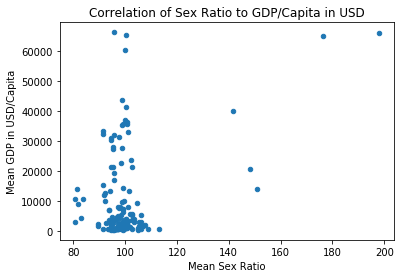

In [51]:
df_sr_summary.plot(x='sr_mean', y='gdp_mean', kind='scatter')
plt.title('Correlation of Sex Ratio to GDP/Capita in USD')
plt.ylabel('Mean GDP in USD/Capita')
plt.xlabel('Mean Sex Ratio')
plt.show()

The graph displays a positive correlation (0.38), especially if the outliers are considererd. For most of the outliers, the mean GDP tends to be higher.

I try to remove the outliers for a better visualization.

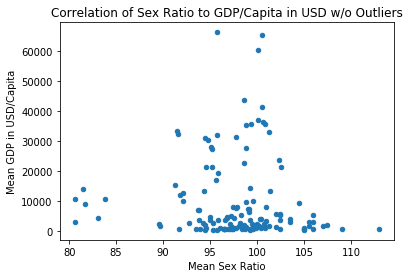

In [52]:
df_sr_summary2 = df_sr_summary[df_sr_summary['sr_mean'] <= 140]
df_sr_summary2.plot(x='sr_mean', y='gdp_mean', kind='scatter')
plt.title('Correlation of Sex Ratio to GDP/Capita in USD w/o Outliers')
plt.ylabel('Mean GDP in USD/Capita')
plt.xlabel('Mean Sex Ratio')
plt.show()

In [53]:
df_sr_summary2.corr()

,1950,2020,sr_mean,gdp_mean,gdp_growth_mean,dem_index_mean,mil_exp_mean,cars_mean,alc_cons_mean
1950,1.000000,0.639023,0.955230,-0.085911,0.377516,-0.066330,0.124155,-0.212491,-0.507184
2020,0.639023,1.000000,0.837989,-0.012472,0.337267,-0.106041,0.108094,-0.193039,-0.503936
sr_mean,0.955230,0.837989,1.000000,-0.065745,0.397550,-0.087845,0.129658,-0.224999,-0.553649
gdp_mean,-0.085911,-0.012472,-0.065745,1.000000,-0.158123,0.678362,-0.052477,0.856847,0.405449
gdp_growth_mean,0.377516,0.337267,0.397550,-0.158123,1.000000,-0.064171,0.183299,-0.180488,-0.306709
dem_index_mean,-0.066330,-0.106041,-0.087845,0.678362,-0.064171,1.000000,-0.199393,0.735332,0.465174
mil_exp_mean,0.124155,0.108094,0.129658,-0.052477,0.183299,-0.199393,1.000000,-0.085478,-0.163731
cars_mean,-0.212491,-0.193039,-0.224999,0.856847,-0.180488,0.735332,-0.085478,1.000000,0.544688
alc_cons_mean,-0.507184,-0.503936,-0.553649,0.405449,-0.306709,0.465174,-0.163731,0.544688,1.000000


Removing the outliers also reduces the correlation, and the GDP correlation even becomes negative. The outliers seem to have a certain influence on the correlation. For the next plots, I will show both, the original data and the modified data without outliers.

The next plot will show the GDP growth:

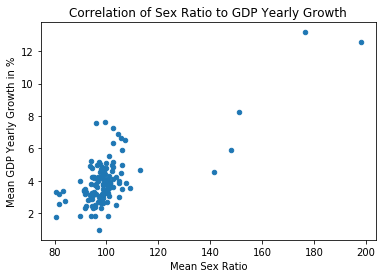

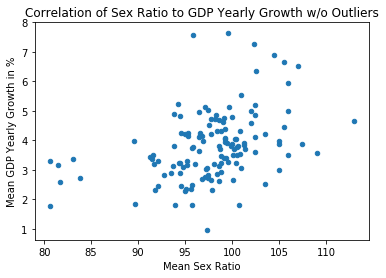

In [54]:
df_sr_summary.plot(x='sr_mean', y='gdp_growth_mean', kind='scatter')
plt.title('Correlation of Sex Ratio to GDP Yearly Growth')
plt.ylabel('Mean GDP Yearly Growth in %')
plt.xlabel('Mean Sex Ratio')
plt.show()
df_sr_summary2.plot(x='sr_mean', y='gdp_growth_mean', kind='scatter')
plt.title('Correlation of Sex Ratio to GDP Yearly Growth w/o Outliers')
plt.ylabel('Mean GDP Yearly Growth in %')
plt.xlabel('Mean Sex Ratio')
plt.show()

I detect a positive correlation between mean GDP growth and increasing mean Sex Ratio (0.49).

The next index will be the Democracy Index:

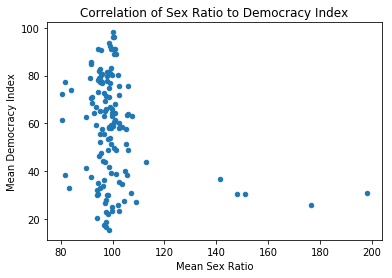

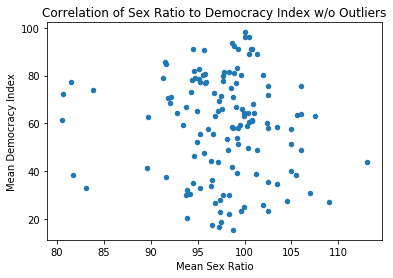

In [55]:
df_sr_summary.plot(x='sr_mean', y='dem_index_mean', kind='scatter')
plt.title('Correlation of Sex Ratio to Democracy Index')
plt.ylabel('Mean Democracy Index')
plt.xlabel('Mean Sex Ratio')
plt.show()
df_sr_summary2.plot(x='sr_mean', y='dem_index_mean', kind='scatter')
plt.title('Correlation of Sex Ratio to Democracy Index w/o Outliers')
plt.ylabel('Mean Democracy Index')
plt.xlabel('Mean Sex Ratio')
plt.show()

The correlation for mean Democracy Index and mean Sex Ratio tends to be weak and negative (-0.25).

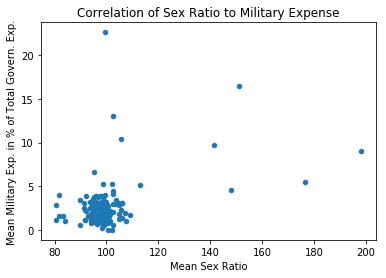

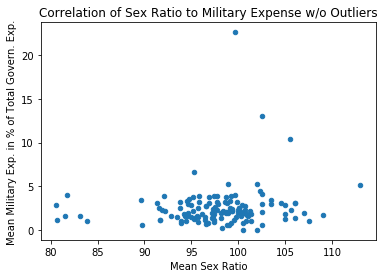

In [56]:
df_sr_summary.plot(x='sr_mean', y='mil_exp_mean', kind='scatter')
plt.title('Correlation of Sex Ratio to Military Expense')
plt.ylabel('Mean Military Exp. in % of Total Govern. Exp.')
plt.xlabel('Mean Sex Ratio')
plt.show()
df_sr_summary2.plot(x='sr_mean', y='mil_exp_mean', kind='scatter')
plt.title('Correlation of Sex Ratio to Military Expense w/o Outliers')
plt.ylabel('Mean Military Exp. in % of Total Govern. Exp.')
plt.xlabel('Mean Sex Ratio')
plt.show()

Interestingly, the correlation for military expenditure is visible (0.44), however by majority influenced by outliers. As outliers are removed, correlation coefficient drops to 0.12.

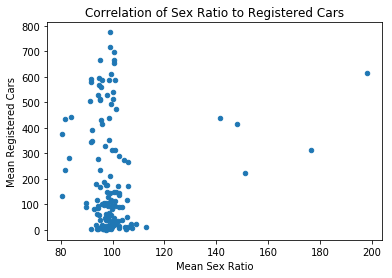

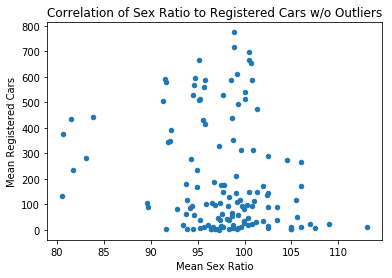

In [57]:
df_sr_summary.plot(x='sr_mean', y='cars_mean', kind='scatter')
plt.title('Correlation of Sex Ratio to Registered Cars')
plt.ylabel('Mean Registered Cars')
plt.xlabel('Mean Sex Ratio')
plt.show()
df_sr_summary2.plot(x='sr_mean', y='cars_mean', kind='scatter')
plt.title('Correlation of Sex Ratio to Registered Cars w/o Outliers')
plt.ylabel('Mean Registered Cars')
plt.xlabel('Mean Sex Ratio')
plt.show()

The correlation between mean registered cars and Sex Ratio is almost zero(0.09). When removing the outliers, the correlation becomes even negative (-0.22).

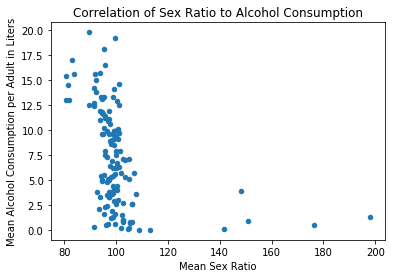

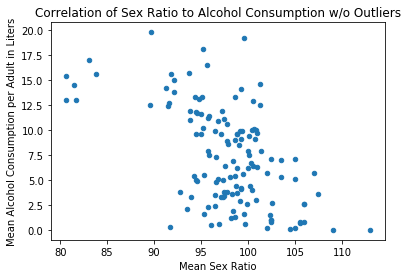

In [58]:
df_sr_summary.plot(x='sr_mean', y='alc_cons_mean', kind='scatter')
plt.title('Correlation of Sex Ratio to Alcohol Consumption')
plt.ylabel('Mean Alcohol Consumption per Adult in Liters')
plt.xlabel('Mean Sex Ratio')
plt.show()
df_sr_summary2.plot(x='sr_mean', y='alc_cons_mean', kind='scatter')
plt.title('Correlation of Sex Ratio to Alcohol Consumption w/o Outliers')
plt.ylabel('Mean Alcohol Consumption per Adult in Liters')
plt.xlabel('Mean Sex Ratio')
plt.show()

Finally, the correlation between mean Sex Ratio and mean alcohol consumption is negative (-0.4), and even stronger with outliers removed (-0.55).

In [59]:
df_sr_summary.corr()

,1950,2020,sr_mean,gdp_mean,gdp_growth_mean,dem_index_mean,mil_exp_mean,cars_mean,alc_cons_mean
1950,1.000000,0.279558,0.554737,0.059261,0.318537,-0.133388,0.242586,-0.104459,-0.505712
2020,0.279558,1.000000,0.953933,0.417165,0.724275,-0.239784,0.390508,0.141675,-0.284989
sr_mean,0.554737,0.953933,1.000000,0.380024,0.727177,-0.249472,0.414208,0.090131,-0.404989
gdp_mean,0.059261,0.417165,0.380024,1.000000,0.207929,0.485644,0.096569,0.823807,0.253986
gdp_growth_mean,0.318537,0.724275,0.727177,0.207929,1.000000,-0.194677,0.352149,-0.014728,-0.348625
dem_index_mean,-0.133388,-0.239784,-0.249472,0.485644,-0.194677,1.000000,-0.268797,0.655849,0.493689
mil_exp_mean,0.242586,0.390508,0.414208,0.096569,0.352149,-0.268797,1.000000,-0.006253,-0.243071
cars_mean,-0.104459,0.141675,0.090131,0.823807,-0.014728,0.655849,-0.006253,1.000000,0.478244
alc_cons_mean,-0.505712,-0.284989,-0.404989,0.253986,-0.348625,0.493689,-0.243071,0.478244,1.000000


<a id='conclusions'></a>
## Conclusions

The analysis of the Sex Ratio development over the past 70 years revealed that the countries have become more male over time. In 1950, the majority of the countries hat a Sex Ratio lower than 100 (mean 98.6), but in 2020 the mean Sex Ratio was 102. However, the development from 98.6 to 102 over 70 years is quite little and on a weighted scale by population, the increase becomes even less (from 100 to 102). 

One explanation could be that the starting point of 1950 reflects the major losses of young males in the World War two. Hence, the dataset may be biased in the way that the "normal" ratio tends to have a higher Sex Ratio, but was reduced in the 1950 and following by the millions of deaths from the war activities. Another explanation for the increase in Sex Ratio may be also that policies or cultural habits as in China (one-child policy) or India incentivized people to give birth to males rather than females. 

As the life expectancy for females tend to be higher, I would expect that there might be a turning point at some time in the development and the Sex Ratio will start to decrease as the population increasingly becomes older. I have not done an analysis of the age distribution by country and the effects this may have on correlation. This could be done in a follow-up analysis.

In a second analysis, I wanted to find out whether certain indices may confirm stereotypical biases. 
For this, I have analyzed the correlation between the mean Sex Ratio and:

### 1. GDP per Capita in USD and 2. GDP growth
There is a weak positive correlation of 0.38. For GDP growth, there is a positive correlation of 0.49, which is a bit stronger than the GDP per Capita correlation.

For these two datasets it is striking that outliers seem to have a high influence on the corrrelation, as removing the outliers causes the correlation to desperse (GDP correlation turns even negative -0.06, and GDP groth 0.17).
From the dataset I used to answer the first question, I observed that the outliers tend to cluster by region. This may be an explanation for their distorting in the correlation, as countries that are regionally close, may be similar also not only in Sex Ratio but also in other indices. 

At the moment I have no dataset to analyse the regional closeness of countries and its influence on indices to prove this. This could be done in a follow-up analysis.

Another explanation may be that fast-growing economies tend to attract high-potential workers, which may be rather male than female due to different Gender impacts (education, families, culture). But this development, especially the growing construction industry, that may go along with high-growing economies, may also attract low-qualified construction workers, which also tend to be male. As workers oftern leave their families in their home countries, the male ratio would increase in this case for the fast-growing countries. This could be investigated in a further analysis.

###  3. Democracy Index
There is a weak negative correlation of -0.25. This is a very interesting conclusion to me, even if it is on a very weak basis. 


### 4. Military Expense
There is a positive correlation of 0.41. The correlation is, similar to the GDP, weak but positive. The situation regarding the outliers is similar to GDP and outliers do a lot to distort the correlation (without outliers correlation is 0.12). 

There might be some context between the negative correlation of the Democracy Index and the Military Expense. One explanation may be that authoritarian countries tend to involve more often in war. Other explanations, as regional factors may be also the case. More analysis needs to be done to explore these factors.

### 5. Registered Cars
There is almost no correlation (0.09). This leads to the conclusion that other factors probably influence the decision to buy a car. I would assume that factors such as your housing location (city, country), travel distance to work or family status (married, kids) may influence the decision.

### 6. Alcohol Consumption: 
There is a negative correlation (-0.4), which is very interesting. It tends to be that countries with lower male population have higher alcohol consumption. I suspect that cultural factors may have a great influence on this index. 



## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and thsex ratioen manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [60]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0